### Import Modules

In [7]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import os
from scipy.stats import norm
import matplotlib.pyplot as plt

### Create some fake data

In [29]:
data_size = 15

# Create three independant variables
np.random.seed(0)
f1 = np.random.rand(data_size)*3
f2 = np.random.rand(data_size)*2
f3 = np.random.rand(data_size)/2

# Sum linearly and add some noise
out = (2*f1) + (1*f2) + (-1*f3) + np.random.rand(data_size)

In [30]:
df = pd.DataFrame({
    'feature_1':f1,
    'feature_2':f2,
    'feature_3':f3,
    'target':out
})

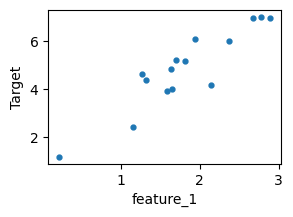

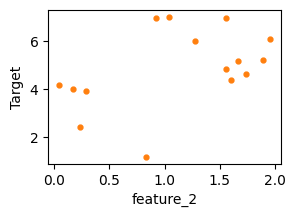

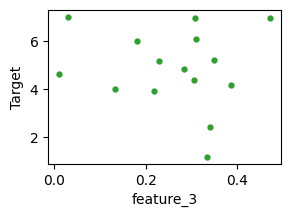

In [31]:
count = 0
for feature in [f for f in list(df) if f!='target']:
    plt.figure(figsize=(3,2))
    plt.plot(df[feature], df['target'], f'C{count}.', markersize=7)
    plt.ylabel('Target')
    plt.xlabel(feature)
    count+=1

In [32]:
df.head(5)

,feature_1,feature_2,feature_3,target
0,1.646441,0.174259,0.132278,4.005500
1,2.145568,0.040437,0.387117,4.154839
2,1.808290,1.665240,0.228075,5.182671
3,1.634650,1.556314,0.284217,4.856824
4,1.270964,1.740024,0.009395,4.636269


In [33]:
# Define features and target
features = ['feature_1', 'feature_2', 'feature_3']
target = 'target'

### Fit linear model

In [34]:
# Prep data
X = sm.add_constant(df[features])
y = df[target]

# Fit model
model = sm.OLS(y, X).fit()


### Print stats

In [35]:
model.summary()

/Users/dominicbates/Documents/Github/statistical-analysis-templates/stats_env/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     189.9
Date:                Wed, 08 Jan 2025   Prob (F-statistic):           9.41e-10
Time:                        18:55:07   Log-Likelihood:                 1.3392
No. Observations:                  15   AIC:                             5.322
Df Residuals:                      11   BIC:                             8.154
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4984      0.255      1.958      0.076      -0.062       1.059
feature_1      2.0645      0.099     20.921      0.000       1.847       2.282
feature_2      0.9118      0.104      8.786      0.000       0.683       1.140
feature_3     -1.5071      0.540     -2.793      0.017      -2.695      -0.319
==============================================================================
Omnibus:                        3.875   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.144   Jarque-Bera (JB):                2.012
Skew:                           0.887   Prob(JB):                        0.366
Kurtosis:                       3.270   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Test some hypotheses

In [48]:
def p_greater(model, feature1, feature2):
    '''
    Compute probability beta_1 is greater than beta_2. (I.e. impact of
    feature 1 is more positive than that of feature 2)
    '''
    
    # Extract coefficients and covariance
    params = model.params
    cov_matrix = model.cov_params()
    
    # Difference in parameter estimates
    mu_delta = params[feature1] - params[feature2]
    
    # Combined standard error (accounting for covariance)
    var_delta = (
        cov_matrix.loc[feature1, feature1] + 
        cov_matrix.loc[feature2, feature2] - 
        2 * cov_matrix.loc[feature1, feature2]
    )
    
    # Probability that beta1 > beta2
    # mu_ste = np.sqrt(var_delta)
    # probability = 1 - norm.cdf(0, loc=mu_delta, scale=mu_ste)

    # Compute standard deviation of Delta
    std_delta = var_delta ** 0.5
    
    # Probability that beta1 > beta2
    probability = 1 - norm.cdf(0, loc=mu_delta, scale=std_delta)

    return probability


def p_greater_zero(model, feature):
    '''
    Compute probability that beta is greater than 0 (i.e. impact of feature 
    is positive)
    '''
    
    # Extract mean and se
    mean = model.params[feature]
    se = model.bse[feature]
    
    # Compute the Z-score
    z_score = mean / se
    
    # Compute the probability that beta_3 > 0
    probability = 1 - norm.cdf(0, loc=mean, scale=se)

    # Using the Z-score to find the probability instead
    # probability_z = norm.cdf(z_score)

    return probability
    

In [47]:
print(f'Prob f2 > f3: {p_greater(model, features[1], features[2]):.3f}')
print(f'Prob f3 > 0: {p_greater_zero(model, features[2]):.3f}')

Prob f2 > f3: 1.000
Prob f3 > 0: 0.003
